In [1]:
import json
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import os
import re 
from textblob import TextBlob 
import plotly as py
import plotly.graph_objs as go

In [4]:
data = []
with open('data/brexit_latest.json') as f:
    for line in f:
        data.append(json.loads(line))

In [7]:
screen_name = []
name = []

for i in range (len(data)):
    screen_name.append(data[i]['user']['screen_name'])
    name.append(data[i]['user']['name'])

In [44]:
import random

screen_name_1 = random.sample(screen_name, 1000)

In [16]:
import botometer

mashape_key = "S0GLQjABpCmsh9mt2JHMXGB8ppUwp1SQt6hjsn5niEpiSqMnrQ"
twitter_app_auth = {
    'consumer_key': 'tQUurlNey0pY9UMwzTkdBK2hq',
    'consumer_secret': '1Dx3gB5VxDPKzJ3uGn93KrxcA6sH2cRMYKivvIE3mTtFeneuFS',
    'access_token': '1059154645216620544-3KALQOTnFBySXWfDjfREMPLc6cgpAc',
    'access_token_secret': 'TzyzIS3ZyolV55XcgiIuA0oYkm8TS3LZKiC8UVRkAurAE',
  }
bom = botometer.Botometer(wait_on_ratelimit=True,
                          mashape_key=mashape_key,
                          **twitter_app_auth)


In [46]:
result_1 = []

for i in screen_name_1:
    result_1.append(bom.check_account(i))

In [59]:
result_1[0]

{'cap': {'english': 0.0038317559975942547, 'universal': 0.004725361816828223},
 'categories': {'content': 0.19935698741177266,
  'friend': 0.1594575816736603,
  'network': 0.44801550652707667,
  'sentiment': 0.09785188233608959,
  'temporal': 0.08388930474225163,
  'user': 0.07248797510053138},
 'display_scores': {'content': 1.0,
  'english': 0.5,
  'friend': 0.8,
  'network': 2.2,
  'sentiment': 0.5,
  'temporal': 0.4,
  'universal': 0.5,
  'user': 0.4},
 'scores': {'english': 0.10030935716061677, 'universal': 0.10328573467123618},
 'user': {'id_str': '344141508', 'screen_name': 'Manuel_TSSA'}}

In [62]:
english_score=[]
universal_score=[]
user_id = []
screen_name = []
content = []
english = []
friend = []
network = []
sentiment =[]
temporal = []
universal = []
user = []

for i in result_1:
    english_score.append(i['scores']['english'])
    universal_score.append(i['scores']['universal'])
    user_id.append(i['user']['id_str'])
    screen_name.append(i['user']['screen_name'])
    content.append(i['display_scores']['content'])
    english.append(i['display_scores']['english'])
    friend.append(i['display_scores']['friend'])
    network.append(i['display_scores']['network'])
    sentiment.append(i['display_scores']['sentiment'])
    temporal.append(i['display_scores']['temporal'])
    universal.append(i['display_scores']['universal'])
    user.append(i['display_scores']['user'])

In [65]:
df = pd.DataFrame({'english_score': english_score, 
                  'universal_score': universal_score,
                  'user_id': user_id,
                  'screen_name': screen_name,
                  'content': content,
                  'english': english,
                  'friend': friend,
                  'network': network,
                  'sentiment': sentiment,
                  'temporal': temporal,
                  'universal': universal,
                  'user': user})

In [66]:
df.head()

,english_score,universal_score,user_id,screen_name,content,english,friend,network,sentiment,temporal,universal,user
0,0.100309,0.103286,344141508,Manuel_TSSA,1.0,0.5,0.8,2.2,0.5,0.4,0.5,0.4
1,0.035466,0.052029,161682665,IsmiseMartin,0.4,0.2,0.4,0.6,0.7,0.6,0.3,0.1
2,0.067835,0.119570,2349924301,NeillSchofield,1.8,0.3,1.0,1.0,1.3,0.7,0.6,0.5
3,0.771954,0.495058,486317823,garyt4547,3.5,3.9,3.5,3.5,3.2,3.5,2.5,2.8
4,0.116795,0.088995,277316560,smickie123,1.6,0.6,0.9,1.9,2.1,1.4,0.4,0.8


In [71]:
from pandas import ExcelWriter
from pandas import ExcelFile
 
writer = ExcelWriter('botometer.xlsx')
df.to_excel(writer,'Sheet1',index=False)
writer.save()

In [3]:
df2 = pd.read_excel('botometer.xlsx')

In [4]:
df2.head()

,english_score,universal_score,user_id,screen_name,content,english,friend,network,sentiment,temporal,universal,user
0,0.100309,0.103286,344141508,Manuel_TSSA,1.0,0.5,0.8,2.2,0.5,0.4,0.5,0.4
1,0.035466,0.052029,161682665,IsmiseMartin,0.4,0.2,0.4,0.6,0.7,0.6,0.3,0.1
2,0.067835,0.119570,2349924301,NeillSchofield,1.8,0.3,1.0,1.0,1.3,0.7,0.6,0.5
3,0.771954,0.495058,486317823,garyt4547,3.5,3.9,3.5,3.5,3.2,3.5,2.5,2.8
4,0.116795,0.088995,277316560,smickie123,1.6,0.6,0.9,1.9,2.1,1.4,0.4,0.8


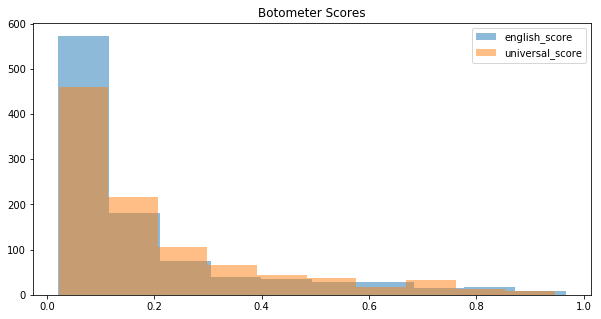

In [13]:
fig, ax = plt.subplots(1, 1, figsize = (10, 5))
                       
ax.hist(df2['english_score'], alpha = 0.5, label = 'english_score')
ax.hist(df2['universal_score'], alpha = 0.5, label = 'universal_score')
ax.set_title('Botometer Scores')
ax.legend()

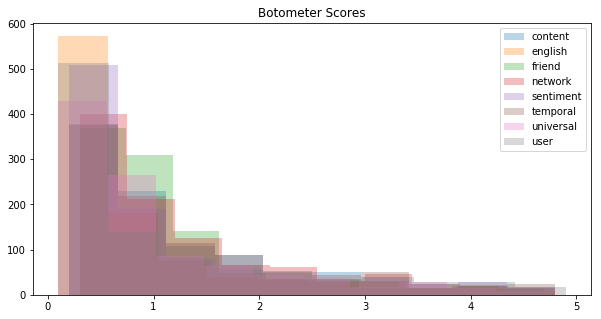

In [21]:
fig, ax = plt.subplots(1, 1, figsize = (10, 5))

alpha = 0.3

ax.hist(df2['content'], alpha = alpha, label = 'content')
ax.hist(df2['english'], alpha = alpha, label = 'english')
ax.hist(df2['friend'], alpha = alpha, label = 'friend')
ax.hist(df2['network'], alpha = alpha, label = 'network')
ax.hist(df2['sentiment'], alpha = alpha, label = 'sentiment')
ax.hist(df2['temporal'], alpha = alpha, label = 'temporal')
ax.hist(df2['universal'], alpha = alpha, label = 'universal')
ax.hist(df2['user'], alpha = alpha, label = 'user')

ax.set_title('Botometer Scores')
ax.legend()

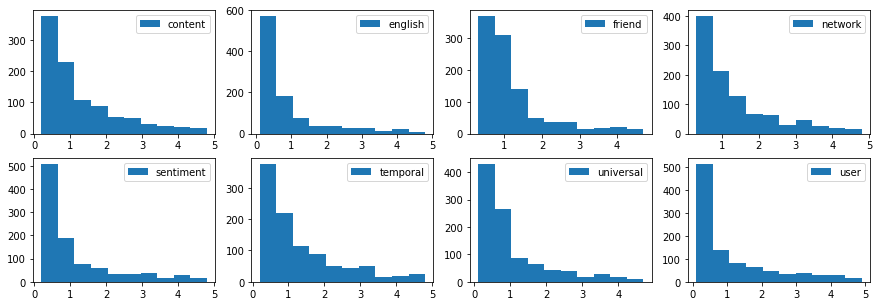

In [29]:
fig, ax = plt.subplots(2, 4, figsize = (15, 5))

alpha = 1

ax[0,0].hist(df2['content'], alpha = alpha, label = 'content', color = 'blue')
ax[0,1].hist(df2['english'], alpha = alpha, label = 'english')
ax[0,2].hist(df2['friend'], alpha = alpha, label = 'friend')
ax[0,3].hist(df2['network'], alpha = alpha, label = 'network')
ax[1,0].hist(df2['sentiment'], alpha = alpha, label = 'sentiment')
ax[1,1].hist(df2['temporal'], alpha = alpha, label = 'temporal')
ax[1,2].hist(df2['universal'], alpha = alpha, label = 'universal')
ax[1,3].hist(df2['user'], alpha = alpha, label = 'user')

ax[0,0].legend()
ax[0,1].legend()
ax[0,2].legend()
ax[0,3].legend()
ax[1,0].legend()
ax[1,1].legend()
ax[1,2].legend()
ax[1,3].legend()